In [3]:
"""
Author: Z Yan from Florida State University
Date: 2021/08/28
Caicai ML DT1
"""
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine() # print(wine) knew that it was a dictionary, so we can extract tha data value and target value
print(wine.data) # characteristic matrix
print(wine.data.shape) # (row,column)
print(wine.target) # target matrix; datasets with 3 class

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
(178, 13)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
import pandas as pd
table = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print(table)
print(wine.feature_names)
print(wine.target_names)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3) #Randomly assigned
print(Xtrain.shape)
print(Ytrain.shape)

        0     1     2     3      4     5     6     7     8      9     10  \
0    14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29   5.64  1.04   
1    13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28   4.38  1.05   
2    13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81   5.68  1.03   
3    14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18   7.80  0.86   
4    13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82   4.32  1.04   
..     ...   ...   ...   ...    ...   ...   ...   ...   ...    ...   ...   
173  13.71  5.65  2.45  20.5   95.0  1.68  0.61  0.52  1.06   7.70  0.64   
174  13.40  3.91  2.48  23.0  102.0  1.80  0.75  0.43  1.41   7.30  0.70   
175  13.27  4.28  2.26  20.0  120.0  1.59  0.69  0.43  1.35  10.20  0.59   
176  13.17  2.59  2.37  20.0  120.0  1.65  0.68  0.53  1.46   9.30  0.60   
177  14.13  4.10  2.74  24.5   96.0  2.05  0.76  0.56  1.35   9.20  0.61   

       11      12  0   
0    3.92  1065.0   0  
1    3.40  1050.0   0  
2    3.17  1185

0.9629629629629629


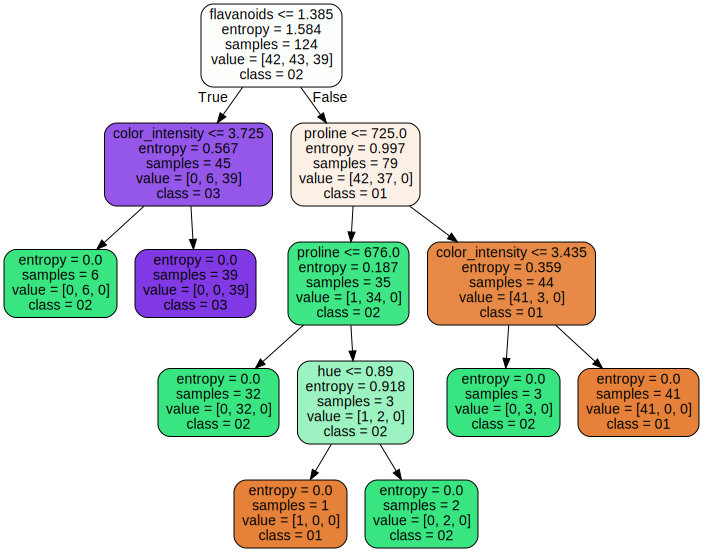

In [5]:
# 1.实例化
clf = tree.DecisionTreeClassifier(criterion="entropy")
# 2.训练
clf = clf.fit(Xtrain, Ytrain)
# 3.打分
score = clf.score(Xtest, Ytest) #返回预测的accuracy
print(score)

feature_name = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
#'酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸'



import graphviz
dot_data = tree.export_graphviz(clf
                                ,feature_names=feature_name
                                ,class_names=["01","02","03"]
                                ,filled=True
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph
# graph.view()

In [6]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=30,splitter="random")
clf = clf.fit(Xtrain, Ytrain)
scoretrain = clf.score(Xtrain, Ytrain)
print(scoretrain)
score = clf.score(Xtest, Ytest)
print(score)
importance = clf.feature_importances_
# print(importance)
print([*zip(feature_name,clf.feature_importances_)]) #形成一个一个的元祖，根节点对于决策树而言重要性都是最高的

1.0
0.9259259259259259
[('alcohol', 0.1277633904484959), ('malic_acid', 0.03435347932300183), ('ash', 0.0), ('alcalinity_of_ash', 0.03155084856452625), ('magnesium', 0.0), ('total_phenols', 0.025899226958435675), ('flavanoids', 0.4515523911750305), ('nonflavanoid_phenols', 0.0), ('proanthocyanins', 0.0), ('color_intensity', 0.0), ('hue', 0.08516425837541694), ('od280/od315_of_diluted_wines', 0.21295077964882725), ('proline', 0.030765625506265673)]


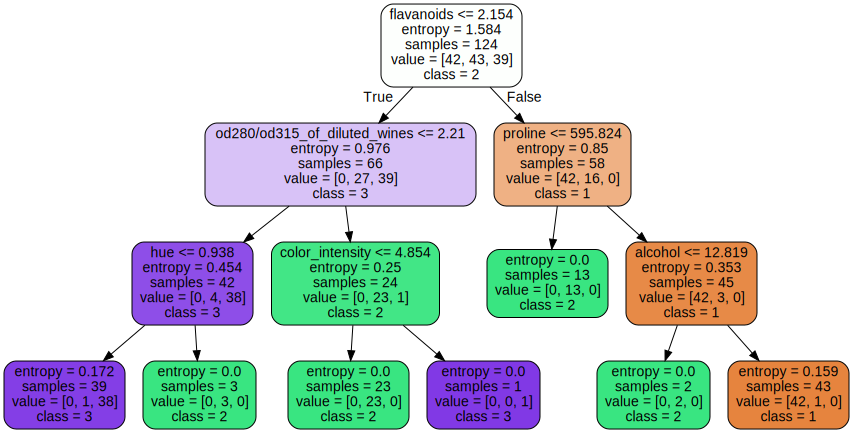

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                             #     ,min_samples_leaf=10
                                  ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain,Ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["1","2","3"]
                                ,filled=True
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [17]:
score = clf.score(Xtest, Ytest)
score

0.9259259259259259

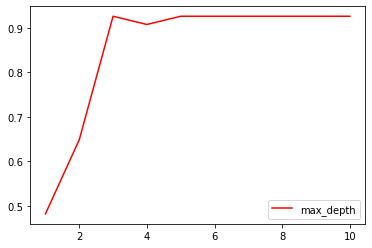

In [18]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                        ,criterion="entropy"
                                        ,random_state=30
                                        ,splitter="random"
                                        )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()